データサイエンス特別PG データサイエンス特論 第13回 主成分分析

In [1]:
# google colab で実行する場合は下記のコメントアウトを外して実行する
# ! wget https://github.com/KHiraGit/sudspg_ds/raw/main/ds07_temp_power_exercise.xlsx
# ! pip install japanize-matplotlib

# また google colab で実行する場合は、matplotlib の annotate でエラーとなるので、
# エラーが出た箇所をコメントアウトされている部分を変更する

# 下記を参考に作成
# https://santakalog.com/2021/02/13/python-pca/

In [2]:
# ライブラリをインポート
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import openpyxl
import pandas as pd
import datetime
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
weather_df = pd.read_excel('ds07_temp_power_exercise.xlsx', 
                           sheet_name='2020熊谷市気象データ_data', skiprows=[0,1,2],
                           names=['年月日', '平均気温', '', '', '最高気温', '', '', '', '', '最低気温', '', '', '', '', 
                           '降水量', '', '', '', '日照時間', '', '', '', '降雪量', '', '', '', '平均風速', '', '', 
                           '平均蒸気圧', '', '', '平均湿度', '', '', '平均現地気圧', '', '', '', '', '', '天気概況', '', ''])

year = 2020
month = 1
data = ['平均気温', '最高気温', '最低気温', '降水量', '日照時間', '降雪量', '平均風速', '平均蒸気圧', '平均湿度', '平均現地気圧'] 
target = '天気概況'
weather_data = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                        & (weather_df['年月日'] < datetime.datetime(year,month+1,1))][data].values
weather_target = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                            & (weather_df['年月日'] < datetime.datetime(year,month+1,1))][target].values
# データを標準化
stdsc = StandardScaler()
weather_data = stdsc.fit_transform(weather_data)

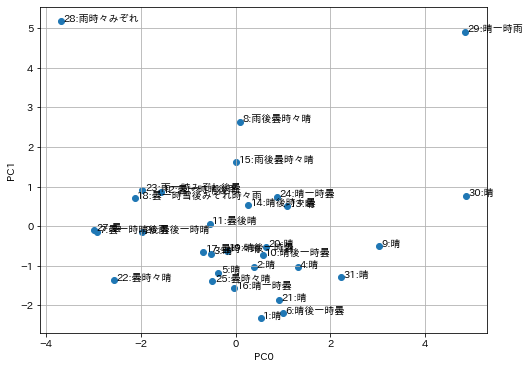

In [4]:
#主成分分析を実行
pca = PCA()
pca.fit(weather_data)

# データを主成分空間に写像
pca_cor = pca.transform(weather_data)

# 第一主成分と第二主成分で各日を天気概況付きでプロット
plt.figure(figsize=(8, 6))
_day = 1
for x, y, name in zip(pca_cor[:, 0], pca_cor[:, 1], weather_target):
    plt.text(x+0.05, y, f'{_day}:{name}')
    _day = _day + 1
plt.scatter(pca_cor[:, 0], pca_cor[:, 1])
plt.grid()
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.show()

* 2020年1月末の気象データ

|         |平均気温|最高気温|最低気温|降水量|日照時間|降雪量|平均風速|平均蒸気圧|平均湿度|平均現地気圧|天気概況|
|:-------:|:------:|:-------:|:-------:|:------:|:-------:|:------:|:--------:|:---------:|:-------:|:---------:|:-------:|
|2020/1/27|	3.8 | 6.0 | 1.3 | 3 | 0| 0 | 1.3 | 5.6 | 71 | 1022.5 | 曇 |
|2020/1/28|	3.8 | 6.5 | 0.3 | 27.5 | 0 | 1 | 2.3 | 7.9 | 97 | 1015.1 | 雨時々みぞれ |
|2020/1/29| 12.3 | 18.9 | 6.3 | 36 | 8.8 | 0 | 3.8 | 9.8 | 71 |	998.6 | 晴一時雨 |
|2020/1/30|	11.7 | 18.3	| 6.8 |	0 | 9.3 | 0 | 3.8 |	6.7 | 51 | 995 | 晴	|
|2020/1/31|	7.1 | 11.6 | 2.9 | 0 | 9.3 | 0 | 5.5 | 4.9 | 49 | 1001.6 | 晴 |


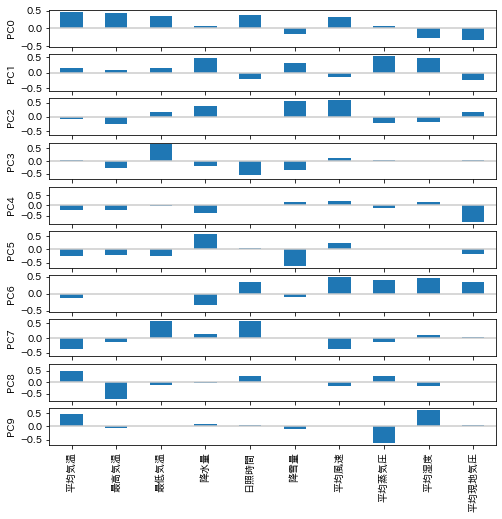

In [5]:
# 固有ベクトルを棒グラフで表示
centers = pd.DataFrame(pca.components_, columns=data)
f, axes = plt.subplots(len(data), 1, sharex=True, figsize=(8,8))
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.1 * np.max(np.max(np.abs(center)))
    center.plot.bar(ax=ax)
    ax.axhline(color='#cccccc')
    ax.set_ylabel(f'PC{i}')
    ax.set_ylim(-maxPC, maxPC)

In [6]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=data, 
             index=["PC{}".format(x) for x in range(len(data))])

,平均気温,最高気温,最低気温,降水量,日照時間,降雪量,平均風速,平均蒸気圧,平均湿度,平均現地気圧
PC0,0.470413,0.443743,0.338544,0.061929,0.377564,-0.170985,0.319183,0.078188,-0.262611,-0.338542
PC1,0.132000,0.071000,0.162720,0.461047,-0.204723,0.318433,-0.157960,0.542114,0.463175,-0.248622
PC2,-0.070613,-0.259849,0.162508,0.369111,-0.016341,0.544663,0.595646,-0.231835,-0.189569,0.153093
PC3,0.048001,-0.287805,0.660603,-0.177539,-0.542080,-0.361676,0.132400,0.053779,-0.011276,0.041692
PC4,-0.249276,-0.237221,-0.058855,-0.354184,0.020556,0.142476,0.185354,-0.122119,0.163133,-0.809984
PC5,-0.243647,-0.199005,-0.251001,0.588770,0.056896,-0.637774,0.232971,0.021123,0.034756,-0.159562
PC6,-0.137430,-0.020445,-0.007047,-0.340799,0.337761,-0.086681,0.496889,0.409389,0.463838,0.336544
PC7,-0.389219,-0.142932,0.561519,0.142469,0.566555,0.009798,-0.377206,-0.142150,0.090150,0.027917
PC8,0.504381,-0.727081,-0.119503,-0.047547,0.285330,0.009446,-0.150988,0.253398,-0.178167,-0.012546
PC9,0.455759,-0.048238,0.002337,0.070992,0.035728,-0.084513,0.015362,-0.613175,0.630559,0.051652


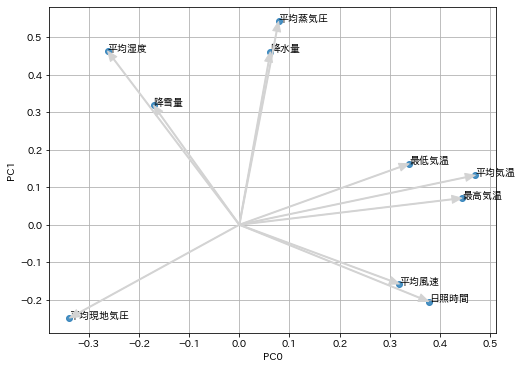

In [7]:
# 第一主成分と第二主成分における観測変数をプロット
plt.figure(figsize=(8, 6))
origin =(0,0)
for x, y, name in zip(pca.components_[0], pca.components_[1], data):
    plt.text(x, y, name)
    plt.annotate(text='', xy=(x,y), xytext=origin,
                 arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, 
                 connectionstyle='arc3', facecolor='lightgray', edgecolor='lightgray'))
    # google colab の場合は以下のコメントアウトを外し、上をコメントアウトする
    # plt.annotate(s='', xy=(x,y), xytext=origin,
    #              arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, 
    #              connectionstyle='arc3', facecolor='lightgray', edgecolor='lightgray'))
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC0")
plt.ylabel("PC1")
plt.show()

In [8]:
# 寄与率 (累積寄与率)
_cumulative_contribution_rate = 0
for i in range(len(data)):
    _cumulative_contribution_rate = _cumulative_contribution_rate + pca.explained_variance_ratio_[i]
    print(f'PC{i} {pca.explained_variance_ratio_[i]:.06f} ({_cumulative_contribution_rate:.06f})')


PC0 0.394890 (0.394890)
PC1 0.296549 (0.691438)
PC2 0.120754 (0.812193)
PC3 0.090043 (0.902236)
PC4 0.047387 (0.949622)
PC5 0.023860 (0.973482)
PC6 0.015185 (0.988667)
PC7 0.008567 (0.997234)
PC8 0.002540 (0.999774)
PC9 0.000226 (1.000000)


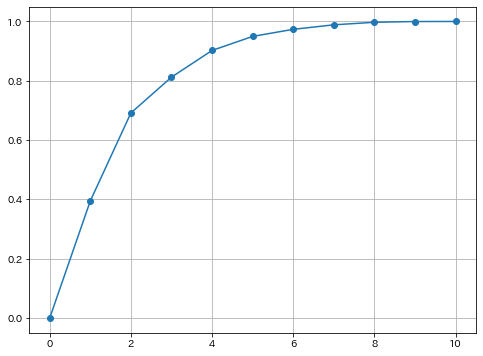

In [9]:
# 累積寄与率
plt.figure(figsize=(8, 6))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.grid()
plt.show()

分析対象期間： 2020年1月
         平均気温      最高気温      最低気温       降水量      日照時間       降雪量      平均風速  \
PC0  0.470413  0.443743  0.338544  0.061929  0.377564 -0.170985  0.319183   
PC1  0.132000  0.071000  0.162720  0.461047 -0.204723  0.318433 -0.157960   
PC2 -0.070613 -0.259849  0.162508  0.369111 -0.016341  0.544663  0.595646   
PC3  0.048001 -0.287805  0.660603 -0.177539 -0.542080 -0.361676  0.132400   
PC4 -0.249276 -0.237221 -0.058855 -0.354184  0.020556  0.142476  0.185354   
PC5 -0.243647 -0.199005 -0.251001  0.588770  0.056896 -0.637774  0.232971   
PC6 -0.137430 -0.020445 -0.007047 -0.340799  0.337761 -0.086681  0.496889   
PC7 -0.389219 -0.142932  0.561519  0.142469  0.566555  0.009798 -0.377206   
PC8  0.504381 -0.727081 -0.119503 -0.047547  0.285330  0.009446 -0.150988   
PC9  0.455759 -0.048238  0.002337  0.070992  0.035728 -0.084513  0.015362   

        平均蒸気圧      平均湿度    平均現地気圧  
PC0  0.078188 -0.262611 -0.338542  
PC1  0.542114  0.463175 -0.248622  
PC2 -0.231835 -0.189569  0.1

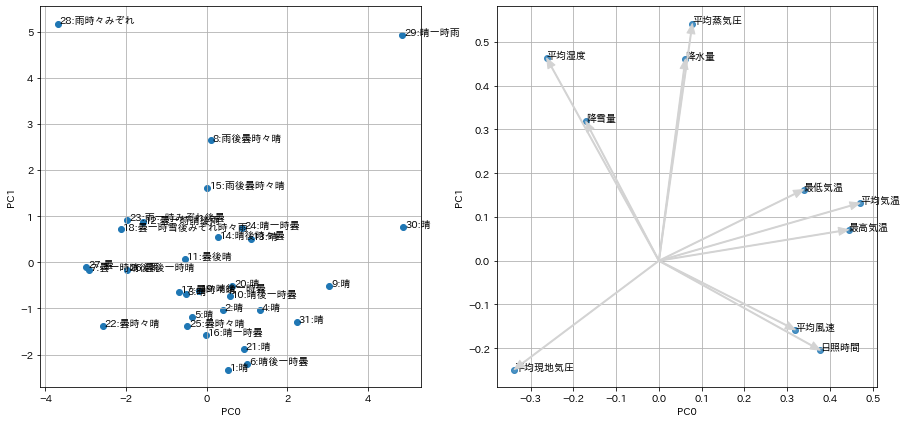

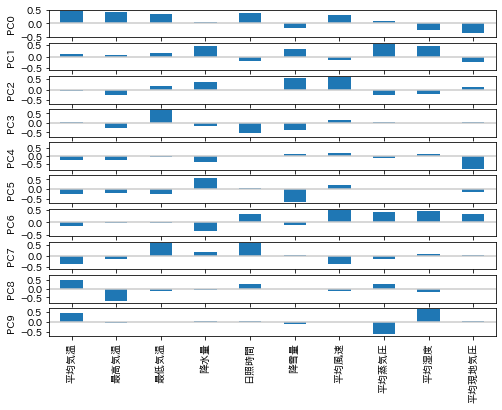

PC0 0.394890 (0.394890)
PC1 0.296549 (0.691438)
PC2 0.120754 (0.812193)
PC3 0.090043 (0.902236)
PC4 0.047387 (0.949622)
PC5 0.023860 (0.973482)
PC6 0.015185 (0.988667)
PC7 0.008567 (0.997234)
PC8 0.002540 (0.999774)
PC9 0.000226 (1.000000)


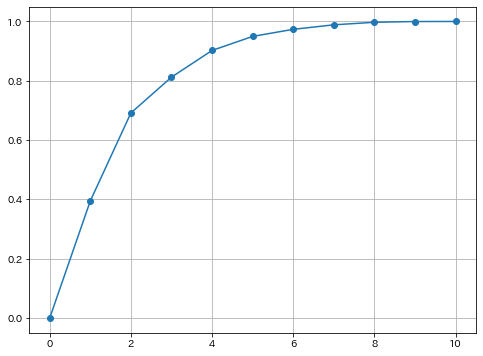

分析対象期間： 2020年2月
         平均気温          最高気温          最低気温           降水量          日照時間  \
PC0  0.355890  2.267622e-01  3.598826e-01  2.610385e-01 -3.998361e-01   
PC1 -0.418748 -5.666883e-01 -2.202531e-01  4.572738e-01 -1.872926e-01   
PC2 -0.168673 -1.284415e-01 -3.447535e-01 -1.328216e-01 -1.444978e-01   
PC3 -0.040225 -4.914333e-01  4.910047e-01 -3.563160e-01 -3.161924e-01   
PC4  0.108704  2.267550e-02  9.421641e-02  7.211571e-01  2.396622e-01   
PC5 -0.201168  2.453313e-01 -1.792363e-01 -2.233642e-01  3.891943e-01   
PC6 -0.188109  4.450459e-01 -3.396732e-01  4.528086e-02 -6.854038e-01   
PC7  0.359463 -2.677774e-01 -4.636519e-01 -6.475903e-02 -2.079190e-04   
PC8  0.671595 -1.974010e-01 -3.011298e-01 -4.420053e-02 -7.420740e-02   
PC9 -0.000000 -1.891642e-17 -6.224979e-17 -6.550656e-19  4.314525e-17   

              降雪量          平均風速         平均蒸気圧          平均湿度        平均現地気圧  
PC0  0.000000e+00 -2.825402e-01  4.430893e-01  3.899110e-01 -1.902834e-01  
PC1  1.734723e-18  5.973822e

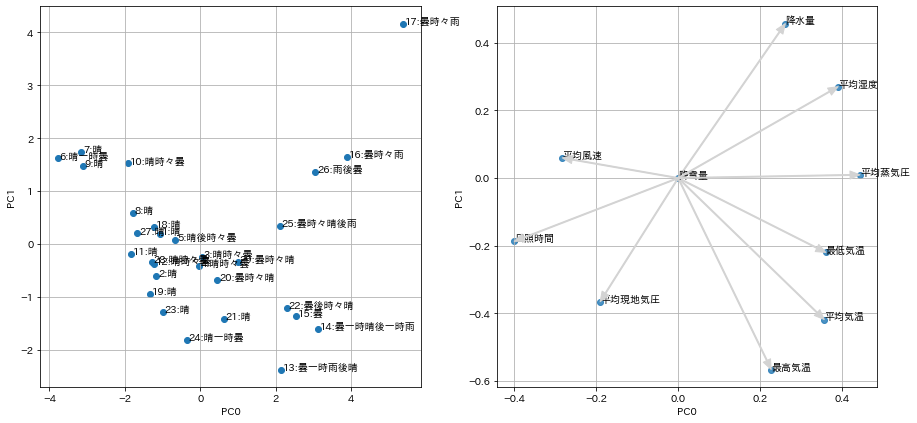

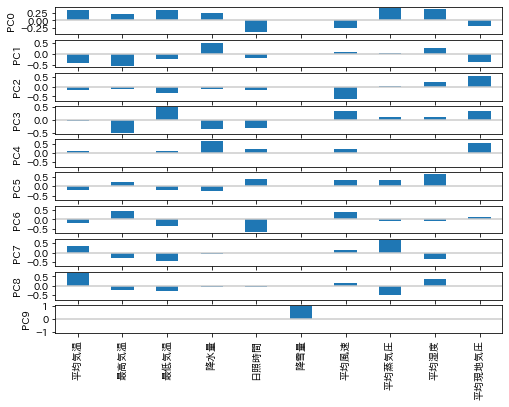

PC0 0.549962 (0.549962)
PC1 0.204902 (0.754864)
PC2 0.130780 (0.885644)
PC3 0.051005 (0.936649)
PC4 0.041172 (0.977821)
PC5 0.011442 (0.989263)
PC6 0.008664 (0.997927)
PC7 0.001460 (0.999387)
PC8 0.000613 (1.000000)
PC9 0.000000 (1.000000)


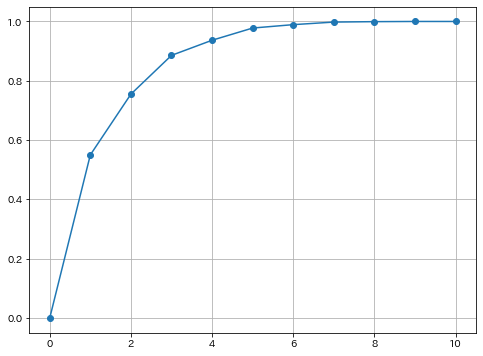

分析対象期間： 2020年3月
         平均気温      最高気温      最低気温       降水量      日照時間       降雪量      平均風速  \
PC0 -0.312009 -0.368100 -0.129194  0.341370 -0.420440  0.293948 -0.313915   
PC1  0.427539  0.274499  0.505549  0.087445 -0.198084 -0.128177 -0.222545   
PC2  0.023424  0.098194  0.002267  0.546311  0.169022  0.528017  0.386334   
PC3  0.308655  0.444011 -0.166642  0.201702  0.151609  0.392668 -0.381003   
PC4 -0.075030  0.231770 -0.647518  0.004290  0.237259 -0.235330 -0.386932   
PC5  0.063224 -0.054805  0.100168 -0.081077 -0.457637  0.149117 -0.451120   
PC6  0.008939  0.261734 -0.206165  0.526633 -0.469497 -0.516825  0.254524   
PC7 -0.150229 -0.293333  0.347968  0.494249  0.490771 -0.330378 -0.368323   
PC8 -0.321527  0.509595  0.282871 -0.019262  0.043712 -0.028047 -0.028600   
PC9  0.698848 -0.333777 -0.164439  0.089961  0.059338 -0.097542  0.055002   

        平均蒸気圧      平均湿度    平均現地気圧  
PC0  0.196065  0.436629  0.207662  
PC1  0.527763  0.219516 -0.216150  
PC2 -0.002129 -0.010573 -0.4

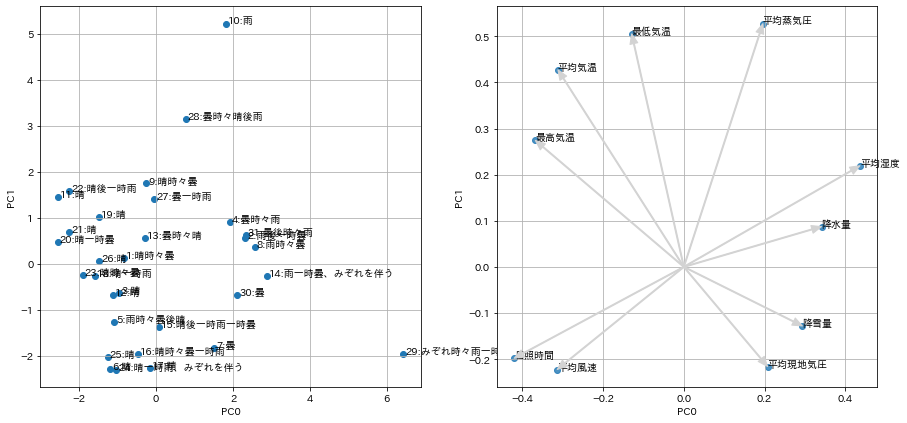

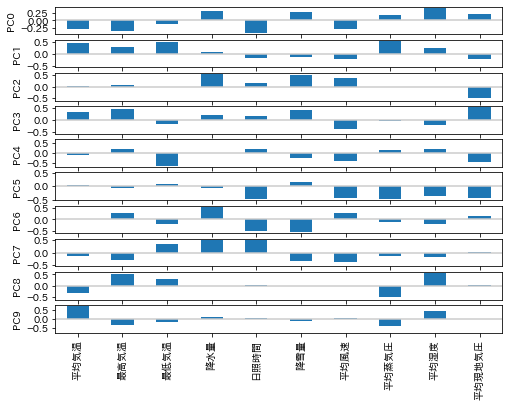

PC0 0.399573 (0.399573)
PC1 0.278319 (0.677892)
PC2 0.136354 (0.814245)
PC3 0.095183 (0.909428)
PC4 0.041761 (0.951189)
PC5 0.021108 (0.972297)
PC6 0.017273 (0.989569)
PC7 0.007383 (0.996952)
PC8 0.002314 (0.999266)
PC9 0.000734 (1.000000)


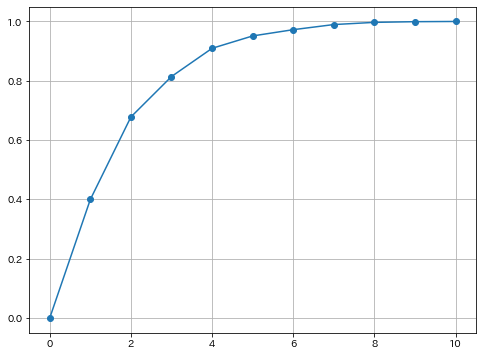

分析対象期間： 2020年4月
         平均気温          最高気温          最低気温           降水量          日照時間  \
PC0 -0.173509 -3.115319e-01  2.983522e-01  3.678945e-01 -4.744767e-01   
PC1  0.552418  4.624739e-01  2.846170e-01 -1.115397e-01  5.931384e-02   
PC2  0.280799  1.467254e-01  4.106340e-01  2.526755e-01  1.889123e-01   
PC3  0.104159  2.557502e-01 -5.265163e-01  2.807267e-01  4.080530e-02   
PC4  0.038708  7.507296e-02 -2.547687e-01  7.680609e-01  2.343157e-01   
PC5 -0.114851 -5.492740e-02 -3.373062e-01 -3.231890e-01  4.391032e-01   
PC6  0.122335  3.917365e-01 -3.594168e-01 -1.161211e-01 -6.892870e-01   
PC7 -0.493669  6.211424e-01  2.747962e-01  3.834462e-02  1.052484e-01   
PC8  0.549243 -2.328109e-01 -2.762992e-02 -1.539523e-02  9.567016e-03   
PC9  0.000000 -5.139267e-16 -1.500759e-16 -2.866378e-17  2.164588e-16   

              降雪量          平均風速         平均蒸気圧          平均湿度        平均現地気圧  
PC0 -0.000000e+00 -1.503979e-01  3.513491e-01  4.766657e-01 -2.237812e-01  
PC1  0.000000e+00 -3.625512e

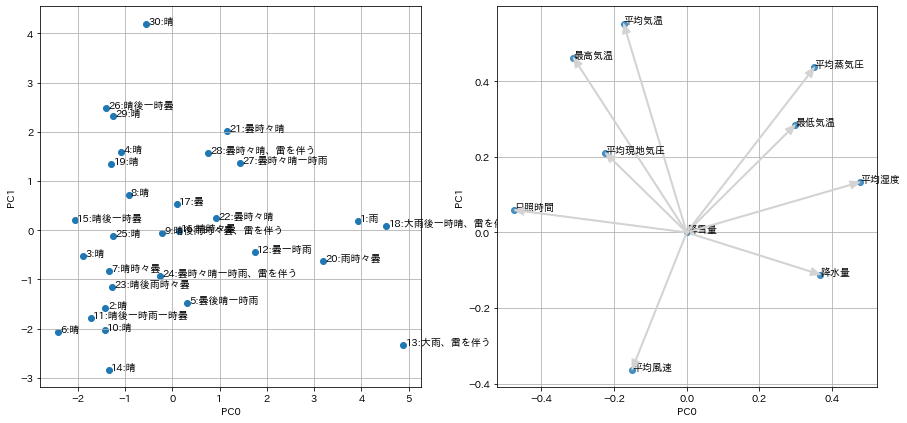

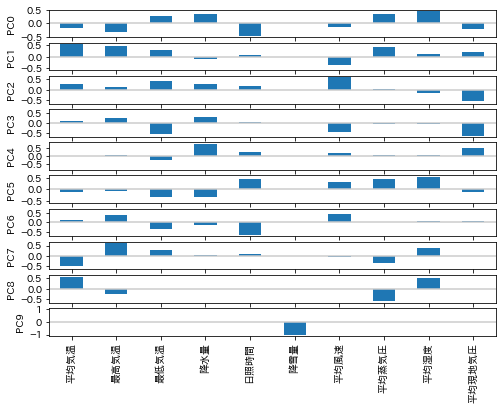

PC0 0.418073 (0.418073)
PC1 0.282877 (0.700951)
PC2 0.130268 (0.831218)
PC3 0.077293 (0.908511)
PC4 0.057456 (0.965967)
PC5 0.024993 (0.990959)
PC6 0.006786 (0.997746)
PC7 0.001842 (0.999588)
PC8 0.000412 (1.000000)
PC9 0.000000 (1.000000)


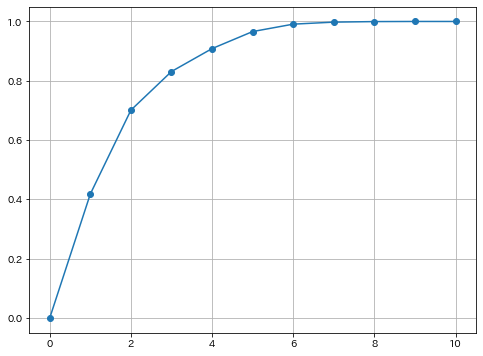

分析対象期間： 2020年5月
         平均気温          最高気温          最低気温           降水量          日照時間  \
PC0 -0.441065 -4.922369e-01 -2.253749e-01  2.551763e-01 -4.639545e-01   
PC1 -0.304660 -1.582447e-01 -4.613957e-01 -1.547968e-01  1.609867e-01   
PC2 -0.075171 -4.690570e-02 -1.069415e-01  6.285104e-01  1.644715e-01   
PC3 -0.078178 -2.765224e-01  4.356447e-01 -3.589238e-01 -2.895950e-01   
PC4  0.239161  1.181929e-01  1.913100e-01  6.038649e-01 -2.336291e-01   
PC5  0.087402 -2.125962e-01  3.232633e-01  1.849173e-02 -4.343330e-01   
PC6  0.144929  4.904685e-01 -5.013822e-01 -1.377036e-01 -6.338727e-01   
PC7 -0.532329  5.862816e-01  3.767765e-01  4.892303e-02 -5.201309e-02   
PC8 -0.575904  1.026866e-01  2.557532e-02  2.684812e-02  1.362960e-02   
PC9 -0.000000  7.385607e-16  3.273475e-16 -4.048343e-18 -2.484842e-16   

              降雪量          平均風速         平均蒸気圧          平均湿度        平均現地気圧  
PC0 -0.000000e+00 -2.382262e-01  4.744272e-02  4.159156e-01  3.651581e-03  
PC1  0.000000e+00  1.844392e

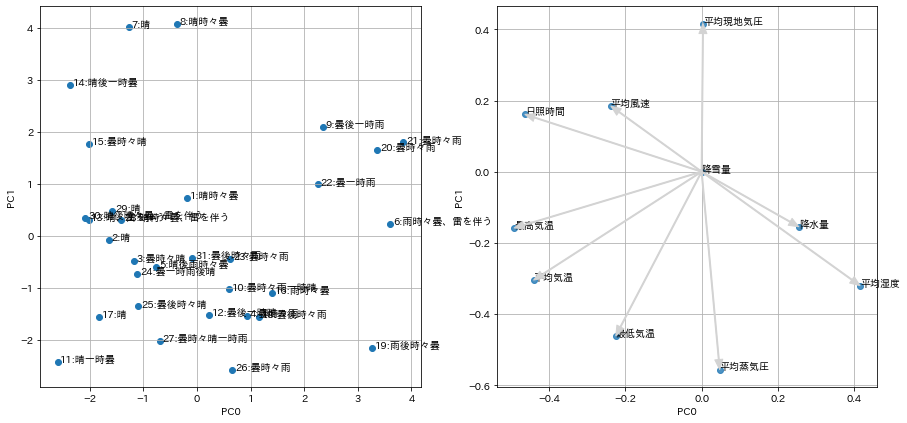

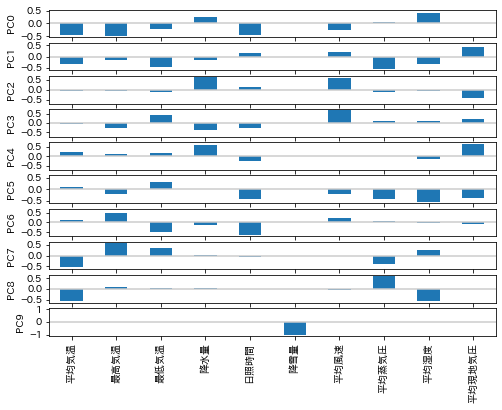

PC0 0.386259 (0.386259)
PC1 0.335106 (0.721365)
PC2 0.129806 (0.851171)
PC3 0.064631 (0.915803)
PC4 0.049864 (0.965666)
PC5 0.025567 (0.991233)
PC6 0.006977 (0.998210)
PC7 0.001060 (0.999270)
PC8 0.000730 (1.000000)
PC9 0.000000 (1.000000)


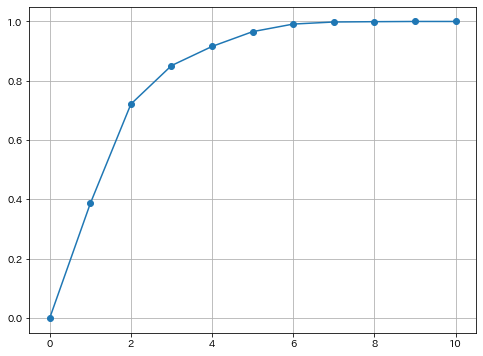

分析対象期間： 2020年6月
         平均気温          最高気温          最低気温           降水量          日照時間  \
PC0 -0.428301 -4.380549e-01 -1.608237e-01  2.074889e-01 -4.531281e-01   
PC1  0.293604  2.173628e-01  5.355778e-01  1.215552e-01 -1.212108e-01   
PC2 -0.007836  3.739683e-02 -2.165656e-01  7.393540e-01  7.581021e-02   
PC3  0.099626  2.323854e-01 -2.916087e-03  5.856127e-01  3.104656e-02   
PC4 -0.137080 -1.818256e-01  3.594107e-01 -3.230028e-02 -3.657147e-01   
PC5  0.024537  4.039289e-01 -6.455334e-01 -2.259435e-01 -6.682151e-02   
PC6  0.407243  4.400531e-02 -2.096134e-01 -2.689671e-03 -7.502383e-01   
PC7 -0.532175  7.056711e-01  2.129298e-01 -1.770050e-02 -2.563739e-01   
PC8  0.501914  9.660496e-02  7.222705e-02 -1.310657e-02 -8.046290e-02   
PC9  0.000000 -2.262427e-16 -2.212368e-16 -2.545716e-17  4.034443e-16   

              降雪量          平均風速         平均蒸気圧          平均湿度        平均現地気圧  
PC0 -2.710505e-20 -3.491285e-01  1.199355e-01  4.627092e-01 -7.091353e-03  
PC1 -0.000000e+00 -2.132091e

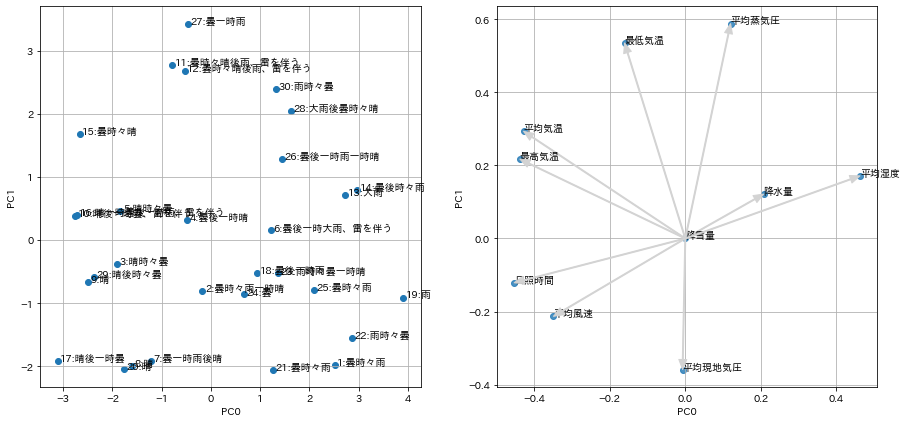

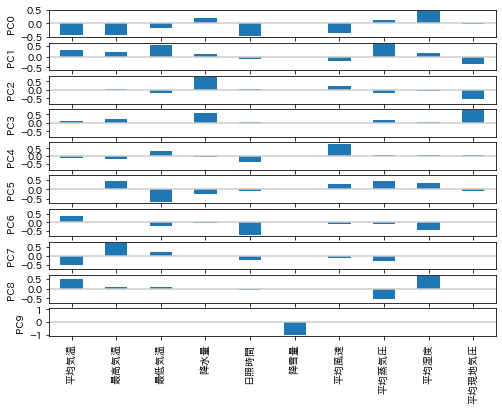

PC0 0.452574 (0.452574)
PC1 0.271155 (0.723729)
PC2 0.110211 (0.833940)
PC3 0.076469 (0.910409)
PC4 0.053355 (0.963765)
PC5 0.021409 (0.985174)
PC6 0.010681 (0.995855)
PC7 0.003795 (0.999650)
PC8 0.000350 (1.000000)
PC9 0.000000 (1.000000)


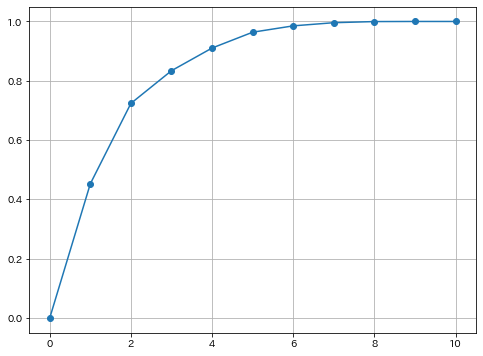

分析対象期間： 2020年7月
         平均気温          最高気温          最低気温           降水量          日照時間  \
PC0  0.490421  5.146020e-01  2.951433e-01 -1.387715e-01  4.286233e-01   
PC1  0.194259 -3.378106e-02  4.535961e-01  2.204485e-01 -2.381147e-01   
PC2  0.050805  5.453653e-02 -1.813426e-03  6.047468e-01  3.745324e-02   
PC3 -0.033053  1.165067e-01 -6.725661e-02  6.967929e-01  9.469927e-02   
PC4  0.061612 -8.274920e-02  3.278688e-01 -1.961665e-01 -5.186633e-01   
PC5  0.231051  2.373049e-01 -2.823822e-01  1.320628e-01 -6.694495e-01   
PC6  0.101140  3.202461e-01 -6.746734e-01 -1.507772e-01 -1.137024e-02   
PC7 -0.444235  7.428024e-01  2.445732e-01 -4.650660e-02 -1.639389e-01   
PC8  0.673293  4.646869e-03 -1.940039e-02 -9.353659e-03 -7.094616e-02   
PC9 -0.000000  3.567214e-16  1.109366e-16 -1.486069e-16 -1.348798e-16   

              降雪量          平均風速         平均蒸気圧          平均湿度        平均現地気圧  
PC0 -0.000000e+00  1.208423e-01  2.370861e-01 -3.657157e-01  5.140470e-03  
PC1  0.000000e+00 -4.625538e

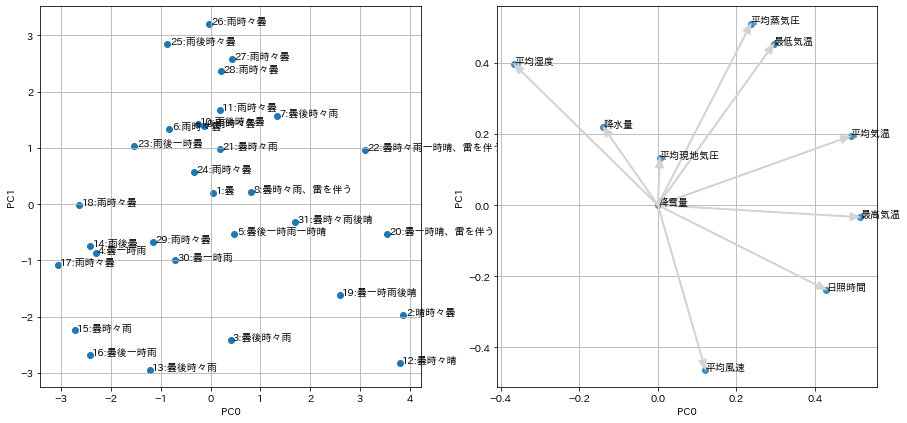

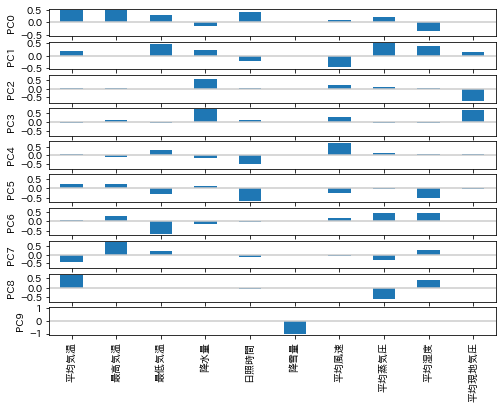

PC0 0.403894 (0.403894)
PC1 0.324659 (0.728553)
PC2 0.127356 (0.855910)
PC3 0.080281 (0.936191)
PC4 0.041380 (0.977571)
PC5 0.014376 (0.991947)
PC6 0.006843 (0.998791)
PC7 0.000942 (0.999733)
PC8 0.000267 (1.000000)
PC9 0.000000 (1.000000)


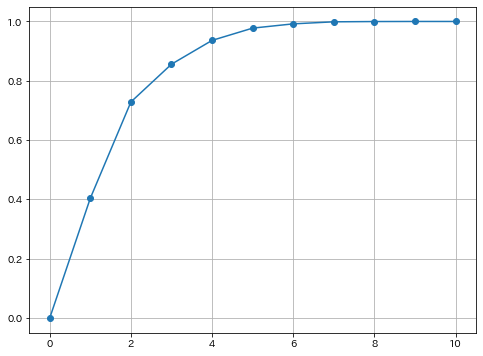

分析対象期間： 2020年8月
         平均気温          最高気温          最低気温           降水量          日照時間  \
PC0 -0.457193 -4.387683e-01 -4.117416e-01  1.307307e-01 -3.719717e-01   
PC1  0.124354  7.653567e-02  1.443104e-01  5.495261e-01 -2.681358e-01   
PC2  0.057586  1.764632e-01 -1.183746e-01  4.603415e-01  9.957367e-02   
PC3  0.030554 -6.603277e-02  2.348817e-01 -2.420253e-01 -3.792990e-01   
PC4  0.027684  1.353579e-01 -1.942145e-01  5.717588e-01 -5.457056e-02   
PC5  0.067812 -1.292221e-01  4.733263e-01  7.008682e-02 -6.357283e-01   
PC6  0.158488  5.523355e-01 -5.747163e-01 -2.803033e-01 -4.782066e-01   
PC7  0.362746 -6.472070e-01 -3.852217e-01 -6.839003e-03 -4.818929e-03   
PC8 -0.780508  8.457927e-02  3.136925e-03  1.738932e-03  1.115326e-02   
PC9  0.000000  5.180120e-16 -2.929539e-16 -7.157666e-17 -1.304335e-16   

              降雪量          平均風速         平均蒸気圧          平均湿度        平均現地気圧  
PC0 -0.000000e+00  8.433664e-02 -3.488180e-01  3.723776e-01  7.759230e-02  
PC1 -0.000000e+00  6.196544e

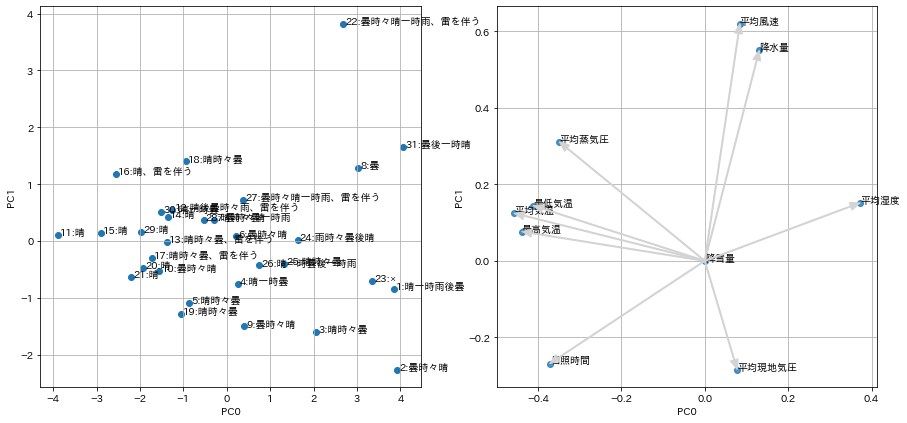

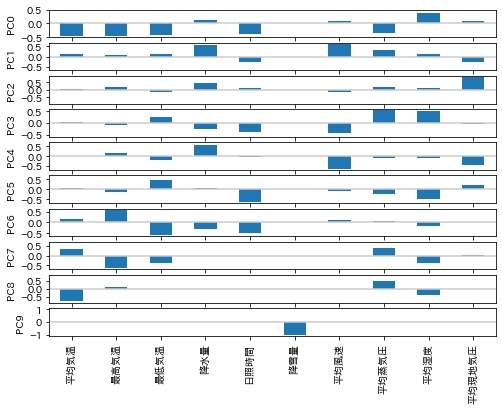

PC0 0.512284 (0.512284)
PC1 0.142850 (0.655134)
PC2 0.118038 (0.773172)
PC3 0.095505 (0.868677)
PC4 0.084469 (0.953146)
PC5 0.030520 (0.983666)
PC6 0.010769 (0.994436)
PC7 0.005285 (0.999721)
PC8 0.000279 (1.000000)
PC9 0.000000 (1.000000)


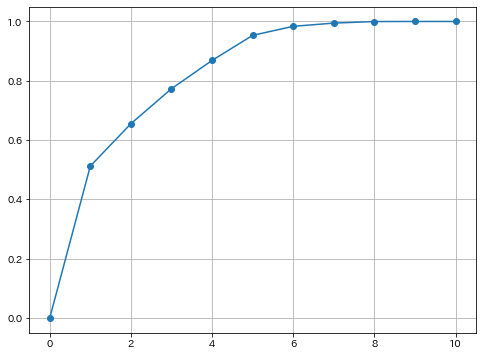

分析対象期間： 2020年9月
         平均気温          最高気温          最低気温           降水量          日照時間  \
PC0  0.481934  4.694648e-01  4.633790e-01  1.977195e-01  1.505999e-01   
PC1  0.070143  1.880293e-01 -1.470934e-01 -3.043222e-01  5.477759e-01   
PC2 -0.131675 -2.000185e-02 -2.354613e-01  4.481858e-01  4.060222e-01   
PC3  0.178962  1.337472e-01  9.303110e-02 -3.241396e-01  3.206268e-02   
PC4  0.000663  6.830343e-02 -8.208918e-02  6.719931e-01  2.360526e-01   
PC5  0.073783 -1.028123e-01  1.534506e-01  3.309222e-01 -5.778577e-01   
PC6  0.235488 -8.264059e-01  3.699085e-01 -3.383784e-03  3.205902e-01   
PC7  0.405834 -1.665780e-01 -7.236543e-01 -1.118292e-02 -1.194869e-01   
PC8  0.698465  5.358326e-03 -9.355804e-02  3.372363e-02 -6.843721e-02   
PC9  0.000000  3.200311e-16 -7.497977e-16 -5.017075e-17 -2.907101e-16   

              降雪量          平均風速         平均蒸気圧          平均湿度        平均現地気圧  
PC0  5.421011e-20  2.187773e-01  4.567787e-01 -1.024290e-02  1.193042e-01  
PC1 -1.387779e-17  3.969808e

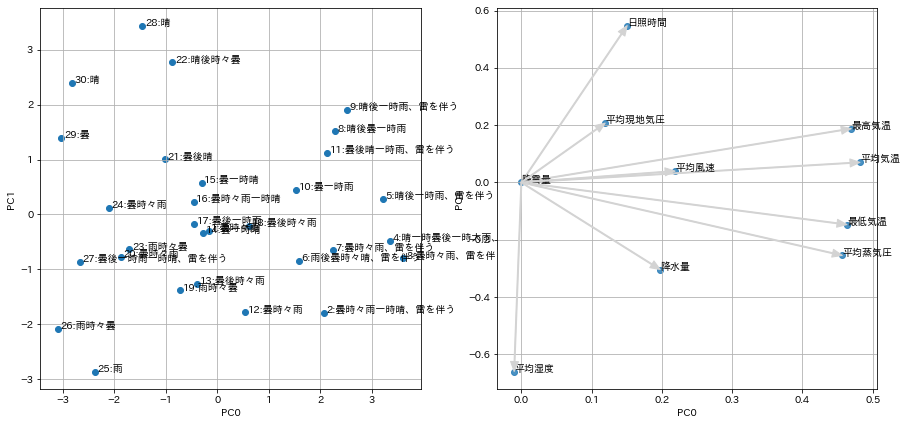

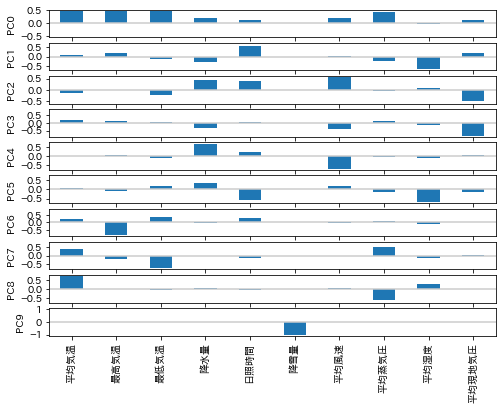

PC0 0.448618 (0.448618)
PC1 0.231148 (0.679766)
PC2 0.126487 (0.806252)
PC3 0.094417 (0.900670)
PC4 0.077185 (0.977855)
PC5 0.018112 (0.995967)
PC6 0.002546 (0.998513)
PC7 0.001252 (0.999765)
PC8 0.000235 (1.000000)
PC9 0.000000 (1.000000)


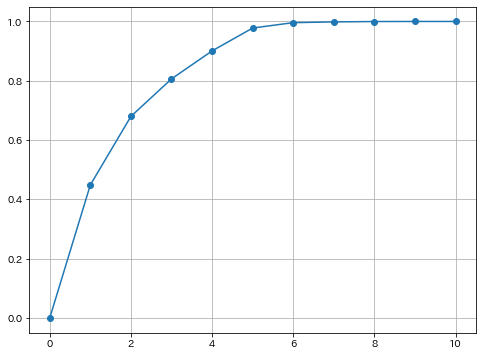

分析対象期間： 2020年10月
         平均気温          最高気温          最低気温           降水量          日照時間  \
PC0 -0.435124 -2.662248e-01 -4.844687e-01 -2.054206e-02  2.424848e-01   
PC1 -0.276542 -4.377912e-01 -7.354157e-02  4.398362e-01 -3.758023e-01   
PC2 -0.095544 -2.776786e-01  1.434946e-01  2.480070e-01 -3.537707e-01   
PC3  0.167004  2.110834e-01  5.818264e-02  7.174228e-01  4.632748e-01   
PC4  0.186378 -1.134742e-03  4.091830e-01 -3.663021e-02 -4.567188e-01   
PC5 -0.105181  7.750434e-03 -1.163782e-01 -4.459266e-01  1.663062e-02   
PC6  0.080646  6.192428e-01 -5.671832e-01  1.592016e-01 -4.934888e-01   
PC7  0.777384 -4.721697e-01 -4.123277e-01 -3.168946e-02 -8.898206e-04   
PC8  0.201350  9.661444e-02  2.514364e-01 -5.811635e-02  8.829401e-02   
PC9  0.000000 -8.925180e-16 -1.595259e-15  1.345847e-16 -4.485361e-16   

              降雪量          平均風速         平均蒸気圧          平均湿度        平均現地気圧  
PC0  0.000000e+00  2.490226e-01 -4.966441e-01 -2.704267e-01  2.531052e-01  
PC1 -0.000000e+00 -3.176525

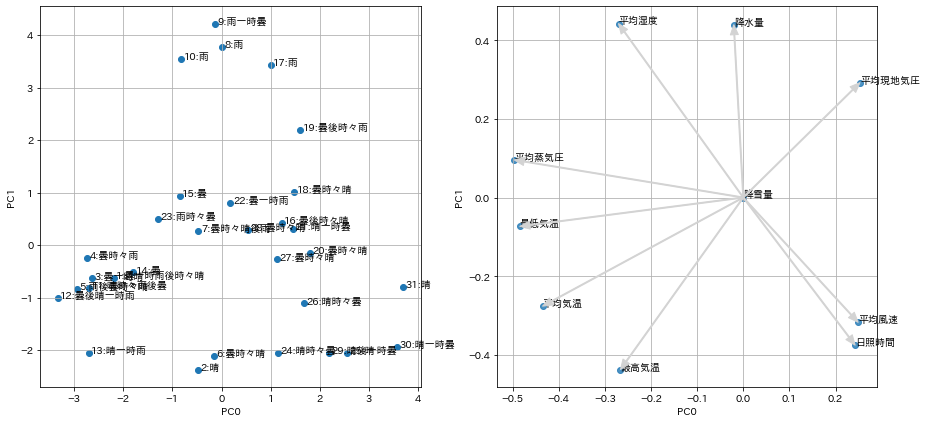

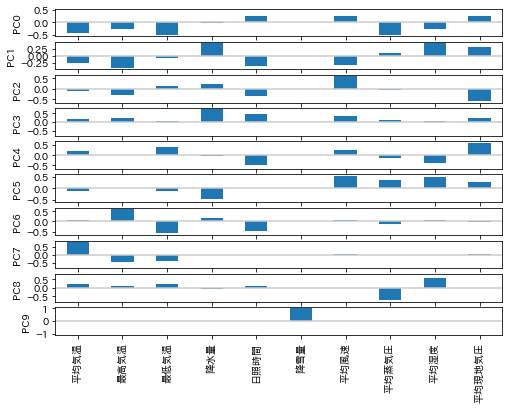

PC0 0.416535 (0.416535)
PC1 0.360442 (0.776978)
PC2 0.097028 (0.874005)
PC3 0.062399 (0.936404)
PC4 0.042360 (0.978764)
PC5 0.014701 (0.993465)
PC6 0.005486 (0.998951)
PC7 0.000610 (0.999561)
PC8 0.000439 (1.000000)
PC9 0.000000 (1.000000)


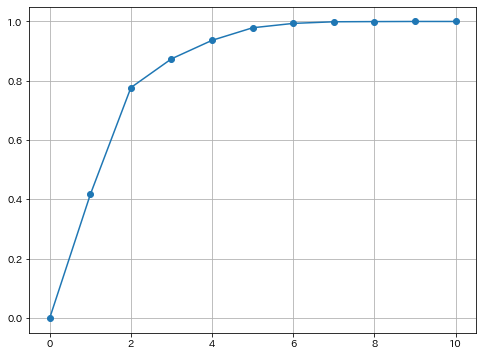

分析対象期間： 2020年11月
         平均気温          最高気温          最低気温           降水量          日照時間  \
PC0  0.372151  2.522302e-01  4.361377e-01  2.891474e-01 -2.994531e-01   
PC1 -0.383883 -4.214871e-01 -1.884531e-01  1.344860e-01 -3.437568e-01   
PC2  0.182540  4.633026e-01 -1.832553e-01 -3.679526e-01  3.845195e-01   
PC3 -0.072060  1.849107e-01 -1.740994e-01  8.581264e-01  4.094038e-01   
PC4  0.206891 -4.369379e-03  3.628792e-01  1.313291e-01 -3.000167e-01   
PC5  0.046184 -1.894951e-01 -1.065083e-01 -1.780505e-02  2.692929e-01   
PC6 -0.044117  5.623228e-01 -5.170643e-01  4.257454e-02 -5.464109e-01   
PC7  0.669851 -3.904415e-01 -5.342773e-01  8.298055e-02 -1.003596e-01   
PC8 -0.424312  7.285862e-02 -1.205948e-01  1.657090e-02 -7.434219e-02   
PC9 -0.000000 -1.628514e-16  1.509288e-16 -5.521230e-17  1.719692e-16   

              降雪量          平均風速         平均蒸気圧          平均湿度        平均現地気圧  
PC0 -0.000000e+00 -1.784609e-01  4.617255e-01  2.974984e-01 -3.175610e-01  
PC1  0.000000e+00 -4.685526

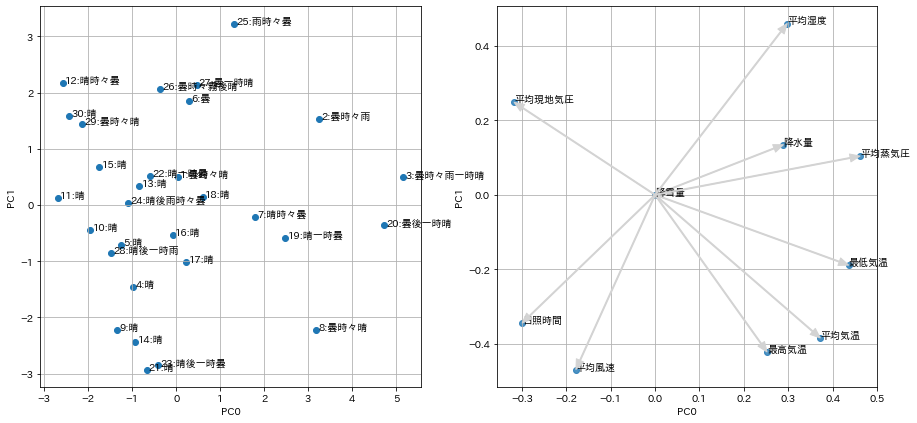

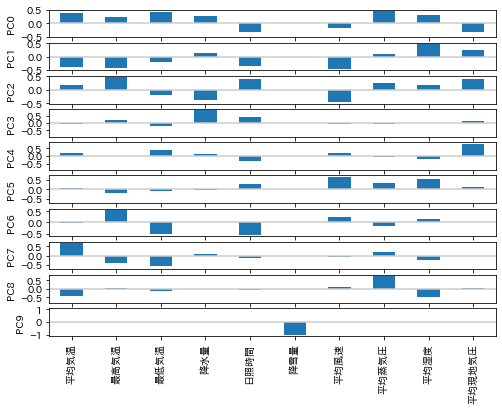

PC0 0.455740 (0.455740)
PC1 0.272672 (0.728412)
PC2 0.130274 (0.858686)
PC3 0.067476 (0.926162)
PC4 0.041385 (0.967547)
PC5 0.022150 (0.989697)
PC6 0.007000 (0.996697)
PC7 0.002575 (0.999272)
PC8 0.000728 (1.000000)
PC9 0.000000 (1.000000)


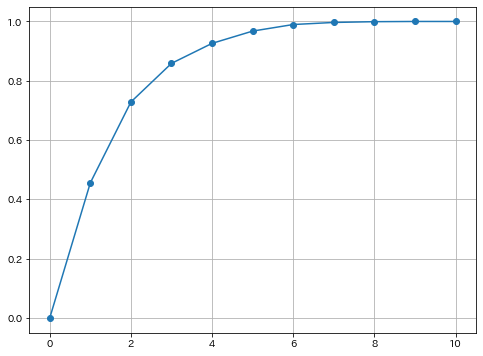

分析対象期間： 2020年12月
         平均気温          最高気温          最低気温           降水量          日照時間  \
PC0 -0.420618 -2.917420e-01 -4.127899e-01  0.000000e+00  2.812087e-01   
PC1  0.265074  4.315370e-01  1.948379e-01 -1.110223e-16  6.207634e-02   
PC2 -0.212597 -4.940861e-01  1.409692e-01 -0.000000e+00 -7.142551e-01   
PC3  0.277126 -1.740982e-01  5.069934e-01 -1.110223e-16 -1.623264e-01   
PC4 -0.087639 -4.476973e-02 -7.633449e-02 -5.551115e-17  1.324590e-01   
PC5 -0.017360 -5.350429e-01  4.743374e-01 -1.665335e-16  5.980921e-01   
PC6  0.692882 -3.993489e-01 -5.266246e-01  5.551115e-17 -1.443476e-02   
PC7  0.377825 -8.047555e-02  8.106654e-02 -2.775558e-17  7.134486e-02   
PC8  0.000000 -1.068669e-16  1.353324e-16  9.756168e-01  6.801503e-17   
PC9  0.000000  2.529949e-16 -1.383449e-16 -2.194807e-01 -2.531495e-16   

              降雪量          平均風速         平均蒸気圧          平均湿度        平均現地気圧  
PC0  0.000000e+00  3.015984e-01 -4.644996e-01 -4.061331e-01 -1.297209e-01  
PC1 -6.938894e-18  5.149018

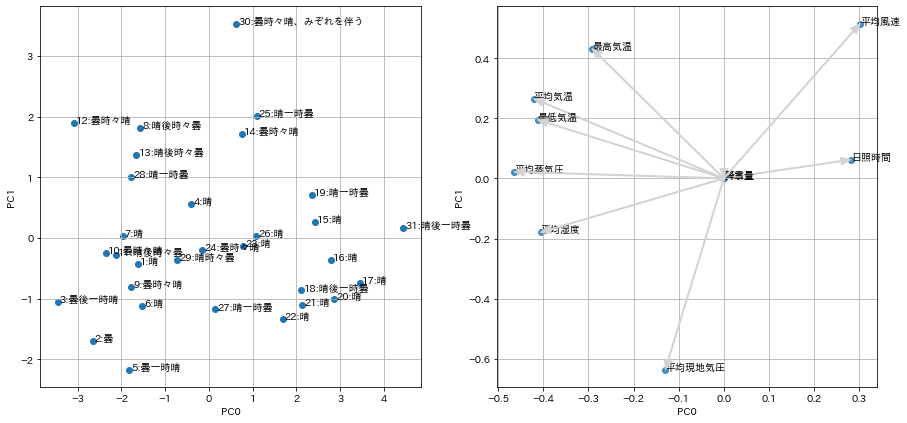

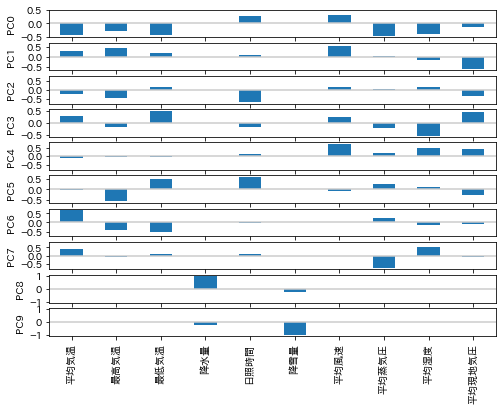

PC0 0.555456 (0.555456)
PC1 0.194152 (0.749608)
PC2 0.143112 (0.892720)
PC3 0.061289 (0.954009)
PC4 0.027545 (0.981554)
PC5 0.014581 (0.996135)
PC6 0.003391 (0.999526)
PC7 0.000474 (1.000000)
PC8 0.000000 (1.000000)
PC9 0.000000 (1.000000)


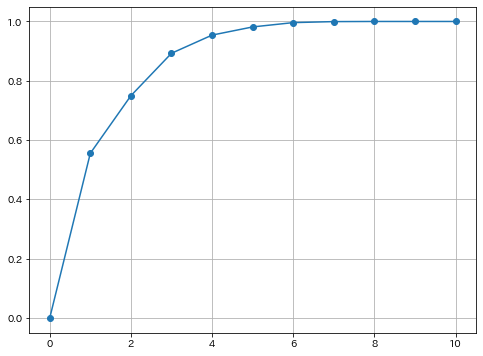

In [10]:
year = 2020
month = 1
data = ['平均気温', '最高気温', '最低気温', '降水量', '日照時間', '降雪量', '平均風速', '平均蒸気圧', '平均湿度', '平均現地気圧'] 
target = '天気概況'

_cum_rate_list = []
for month in range(1, 13):
    if month < 12:
        weather_data = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                                & (weather_df['年月日'] < datetime.datetime(year,month+1,1))][data].values
        weather_target = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                                    & (weather_df['年月日'] < datetime.datetime(year,month+1,1))][target].values
    else:
        weather_data = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                                & (weather_df['年月日'] < datetime.datetime(year+1,1,1))][data].values
        weather_target = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
                                    & (weather_df['年月日'] < datetime.datetime(year+1,1,1))][target].values

    print(f'分析対象期間： {year}年{month}月')

    # データを標準化
    stdsc = StandardScaler()
    weather_data = stdsc.fit_transform(weather_data)

    #主成分分析を実行
    pca = PCA()
    pca.fit(weather_data)

    # データを主成分空間に写像
    pca_cor = pca.transform(weather_data)

    # 第一主成分と第二主成分で各日を天気概況付きでプロット
    plt.figure(figsize=(15, 7))
    ax1 = plt.subplot(1, 2, 1)
    _day = 1
    for x, y, name in zip(pca_cor[:, 0], pca_cor[:, 1], weather_target):
        ax1.text(x+0.05, y, f'{_day}:{name}')
        _day = _day + 1
    ax1.scatter(pca_cor[:, 0], pca_cor[:, 1])
    ax1.grid()
    ax1.set_xlabel("PC0")
    ax1.set_ylabel("PC1")

    # 第一主成分と第二主成分における観測変数をプロット
    ax2 = plt.subplot(1, 2, 2)
    origin =(0,0)
    for x, y, name in zip(pca.components_[0], pca.components_[1], data):
        ax2.text(x, y, name)
        ax2.annotate(text='', xy=(x,y), xytext=origin,
                    arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, 
                    connectionstyle='arc3', facecolor='lightgray', edgecolor='lightgray'))
        # google colab の場合は以下のコメントアウトを外し、上をコメントアウトする
        # ax2.annotate(s='', xy=(x,y), xytext=origin,
        #             arrowprops=dict(shrink=0, width=1, headwidth=8, headlength=10, 
        #             connectionstyle='arc3', facecolor='lightgray', edgecolor='lightgray'))

    ax2.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
    ax2.grid()
    ax2.set_xlabel("PC0")
    ax2.set_ylabel("PC1")

    # PCA の固有ベクトル
    print(pd.DataFrame(pca.components_, columns=data, index=["PC{}".format(x) for x in range(len(data))]))

    # 固有ベクトルを棒グラフで表示
    centers = pd.DataFrame(pca.components_, columns=data)
    f, axes = plt.subplots(len(data), 1, sharex=True, figsize=(8,6))
    for i, ax in enumerate(axes):
        center = centers.loc[i, :]
        maxPC = 1.1 * np.max(np.max(np.abs(center)))
        center.plot.bar(ax=ax)
        ax.axhline(color='#cccccc')
        ax.set_ylabel(f'PC{i}')
        ax.set_ylim(-maxPC, maxPC)
    plt.show()

    # 寄与率 (累積寄与率)
    _cumulative_contribution_rate = 0
    for i in range(len(data)):
        _cumulative_contribution_rate = _cumulative_contribution_rate + pca.explained_variance_ratio_[i]
        print(f'PC{i} {pca.explained_variance_ratio_[i]:.06f} ({_cumulative_contribution_rate:.06f})')

    # 累積寄与率
    plt.figure(figsize=(8, 6))
    plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
    _cum_rate_list.append({'month': f'{month}月', 'data': [0] + list( np.cumsum(pca.explained_variance_ratio_))})
    plt.grid()
    plt.show()




{'month': '1月', 'data': [0, 0.3948897649395805, 0.6914383993922157, 0.8121925340370673, 0.9022358693937115, 0.9496224896832004, 0.9734823985129849, 0.988667327080937, 0.9972338938221245, 0.9997741373257493, 1.0]}
{'month': '2月', 'data': [0, 0.5499616552010339, 0.7548641456148935, 0.8856437932101047, 0.9366485592584053, 0.97782092110073, 0.9892630243682161, 0.9979273060118665, 0.9993871599921977, 0.9999999999999999, 0.9999999999999999]}
{'month': '3月', 'data': [0, 0.39957309574835614, 0.6778917759072427, 0.8142453008112993, 0.9094282328542694, 0.9511890824393978, 0.9722967650818148, 0.989569419792127, 0.9969521124615235, 0.9992661254104029, 1.0]}
{'month': '4月', 'data': [0, 0.4180732930695541, 0.7009507554477572, 0.8312184294322709, 0.9085109879978528, 0.9659666571280527, 0.990959373230135, 0.9977456871782767, 0.9995880349556158, 1.0, 1.0]}
{'month': '5月', 'data': [0, 0.3862588009870103, 0.7213647477255021, 0.8511712222084874, 0.9158025437105972, 0.9656661510016465, 0.9912329017318019, 

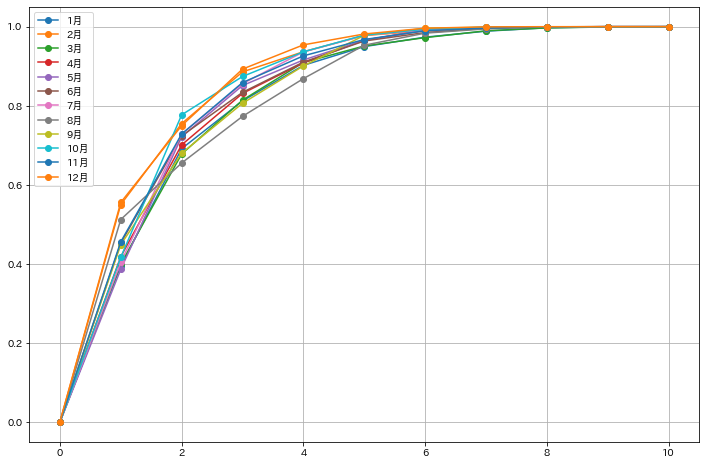

In [11]:
plt.figure(figsize=(12, 8))
for _rate in _cum_rate_list:
    print(_rate)
    plt.plot(_rate['data'], '-o', label=_rate['month'])

plt.grid()
plt.legend()
plt.show()
